In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
leases = pd.read_csv("C:/Users/rhian/Downloads/Leases.csv")  
price_availability_data = pd.read_csv("C:/Users/rhian/Downloads/Price and Availability Data.csv")  
unemployment = pd.read_csv("C:/Users/rhian/Downloads/Unemployment.csv")  
major_market_occupancy = pd.read_csv("C:/Users/rhian/Downloads/Major Market Occupancy Data-revised.csv")  

In [3]:
west_cities = ['Los Angeles', 'Orange County (CA)', 'Phoenix', 'Denver-Boulder', 'Salt Lake City', 'San Diego', 'San Francisco', 'Seattle',
 'South Bay']
west_price_availability = price_availability_data[price_availability_data['market'].isin(west_cities)]

In [ ]:
correlation_matrix = west_price_availability[['available_space', 'leasing', 'overall_rent']].corr()
print(correlation_matrix)

plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap for Available Space, Leasing, and Overall Rent')
plt.show()

In [ ]:
yearly_trends = west_price_availability.groupby('year')[['available_space', 'leasing', 'overall_rent']].mean()
print(yearly_trends)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends.index, yearly_trends['available_space'], label='Available Space', color='blue')
plt.plot(yearly_trends.index, yearly_trends['leasing'], label='Leasing Activity', color='green')
plt.plot(yearly_trends.index, yearly_trends['overall_rent'], label='Overall Rent', color='orange')
plt.title('Yearly Trends for Available Space, Leasing Activity, and Overall Rent (West Region)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.show()

In [ ]:
quarterly_trends = west_price_availability.groupby(['year', 'quarter'])[['available_space', 'leasing', 'overall_rent']].mean().reset_index()

plt.figure(figsize = (14, 8))
sns.lineplot(data = quarterly_trends, x = 'quarter', y = 'available_space', hue = 'year', marker = 'o', palette = 'Reds')
plt.title('Quarterly Trend of Available Space (West Region)')
plt.xlabel('Quarter')
plt.ylabel('Average Available Space')
plt.show()

plt.figure(figsize = (14, 8))
sns.lineplot(data = quarterly_trends, x = 'quarter', y = 'available_space', hue = 'year', marker = 'o', palette = 'Purples')
plt.title('Quarterly Trend of Leasing Activity (West Region)')
plt.xlabel('Quarter')
plt.ylabel('Average Leasing Activity')
plt.show()

plt.figure(figsize = (14, 8))
sns.lineplot(data = quarterly_trends, x = 'quarter', y = 'available_space', hue = 'year', marker = 'o', palette = 'Oranges')
plt.title('Quarterly Trend of Overall Rent (West Region)')
plt.xlabel('Quarter')
plt.ylabel('Average Overall Rent')
plt.show()

In [10]:
leases['internal_industry'].isna().sum() / len(leases)
leases['internal_industry'].value_counts()

internal_industry
Financial Services and Insurance                                                                       4253
Technology, Advertising, Media, and Information                                                        3835
TBD                                                                                                    3786
Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting    2665
Legal Services                                                                                         2109
Construction, Engineering and Architecture                                                             1344
Healthcare                                                                                             1253
Real Estate (except coworking providers)                                                                977
Associations and Non-profit Organizations (except Education and Non-profit Hospitals)                   954
Retail    

C:\Users\rhian\AppData\Local\Temp\ipykernel_16932\1986683400.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


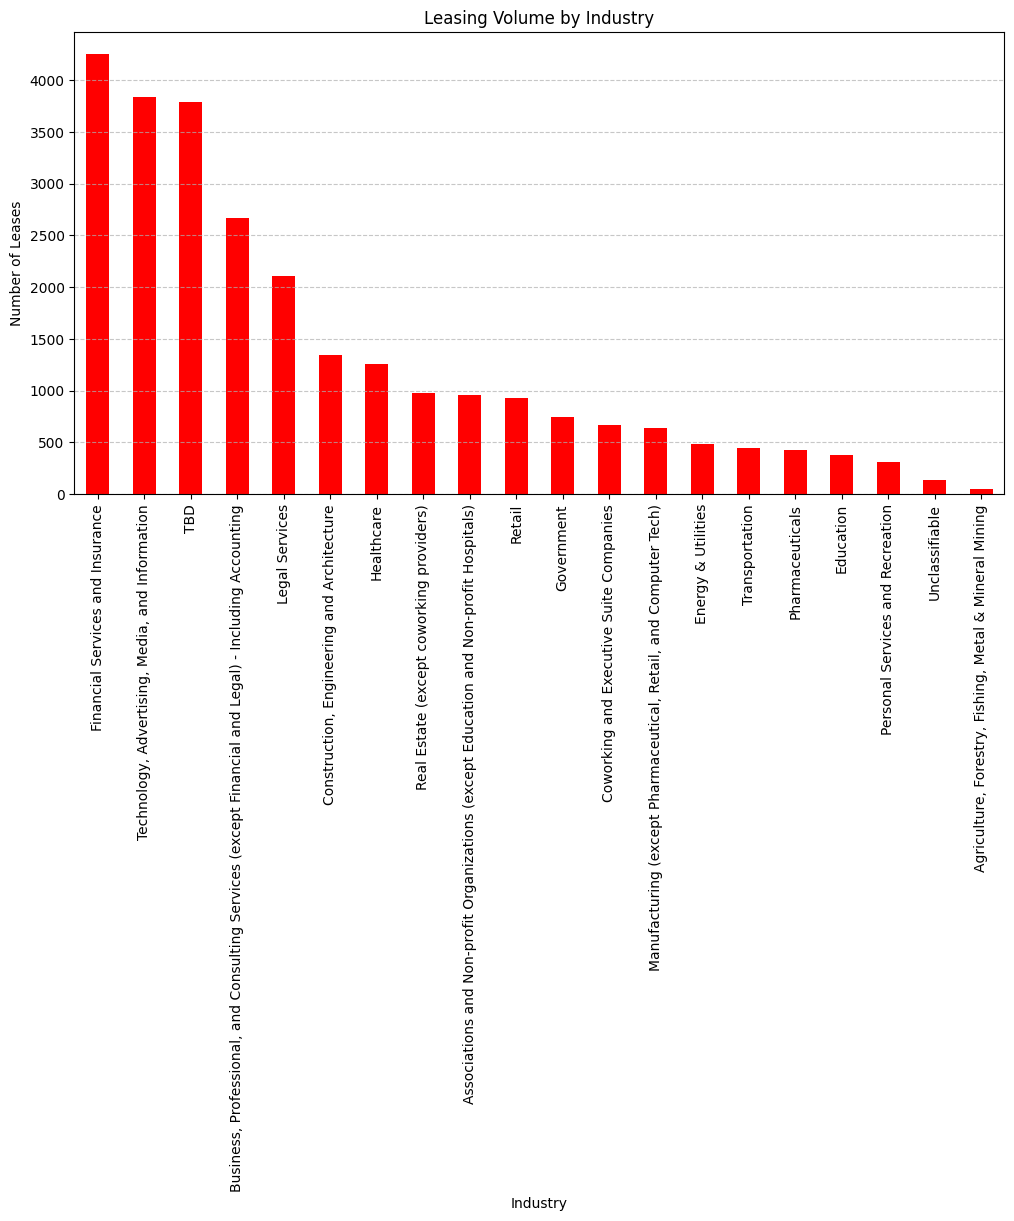

In [13]:
# Distribution of leasing activity across industries
industry_counts = leases['internal_industry'].value_counts()

plt.figure(figsize = (12, 6))
industry_counts.plot(kind = 'bar', color = 'red')
plt.title('Leasing Volume by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Leases')
plt.xticks(rotation = 90)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

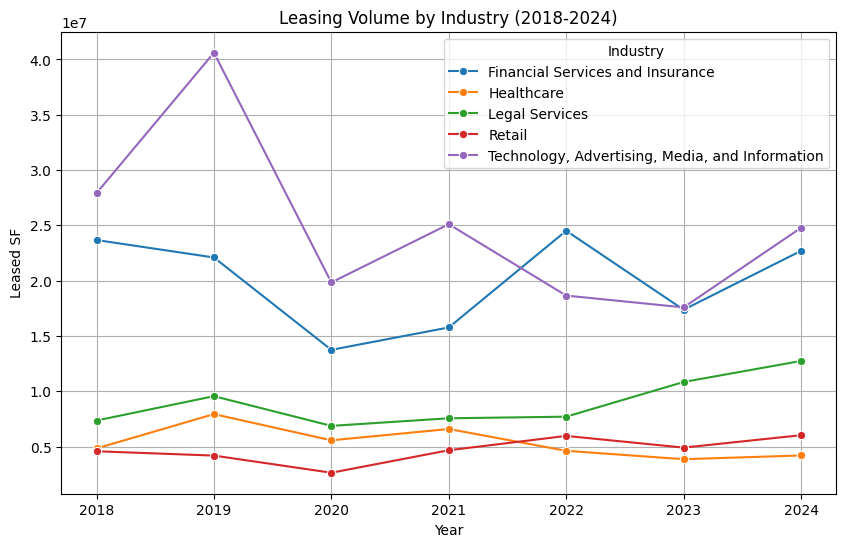

In [16]:
# Leasing Trends across history
key_industries = ['Financial Services and Insurance', 'Technology, Advertising, Media, and Information', 'Legal Services', 'Healthcare', 'Retail']
industry_data = leases[leases['internal_industry'].isin(key_industries)]
industry_trends = industry_data.groupby(['year', 'internal_industry'])['leasedSF'].sum().reset_index()

plt.figure(figsize = (10, 6))
sns.lineplot(data = industry_trends, x = 'year', y = 'leasedSF', hue = 'internal_industry', marker = 'o')
plt.title('Leasing Volume by Industry (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Leased SF')
plt.legend(title='Industry')
plt.grid(True)
plt.show()

In [18]:
pivot_table = industry_trends.pivot(index = 'internal_industry', columns = 'year', values = 'leasedSF')
pivot_table['change'] = ((pivot_table[2024] - pivot_table[2018]) / pivot_table[2018]) * 100
pivot_table[['change']].sort_values('change', ascending = False)

year,change
internal_industry,
Legal Services,73.199782
Retail,31.693415
Financial Services and Insurance,-4.125592
"Technology, Advertising, Media, and Information",-11.214524
Healthcare,-13.145878


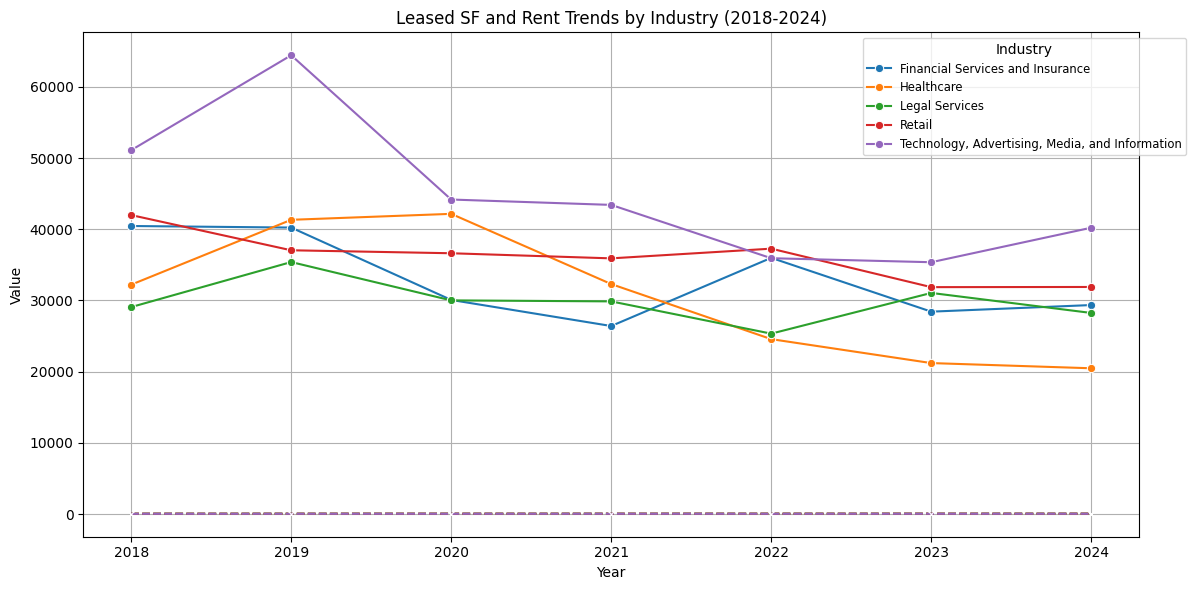

In [30]:
key_industries = ['Legal Services', 'Retail', 'Financial Services and Insurance', 'Technology, Advertising, Media, and Information', 'Healthcare']
industry_data = leases[leases['internal_industry'].isin(key_industries)]
merged_data = pd.merge(industry_data[['year', 'internal_industry', 'leasedSF']], price_availability_data[['year', 'market', 'internal_class_rent']], on = 'year')
industry_rent_trends = merged_data.groupby(['year', 'internal_industry'])[['leasedSF', 'internal_class_rent']].mean().reset_index()

plt.figure(figsize = (12, 6))
sns.lineplot(data = industry_rent_trends, x = 'year', y = 'leasedSF', hue = 'internal_industry', marker = 'o')
sns.lineplot(data = industry_rent_trends, x = 'year', y ='internal_class_rent', hue = 'internal_industry', marker = 'x', linestyle='--')
plt.title('Leased SF and Rent Trends by Industry (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Value')
handles, labels = plt.gca().get_legend_handles_labels()

unique_labels = []
unique_handles = []
seen_labels = set()

for handle, label in zip(handles, labels):
    if label not in seen_labels:
        unique_labels.append(label)
        unique_handles.append(handle)
        seen_labels.add(label)

plt.legend(unique_handles, unique_labels, title='Industry', loc='upper right', fontsize='small', title_fontsize='medium', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

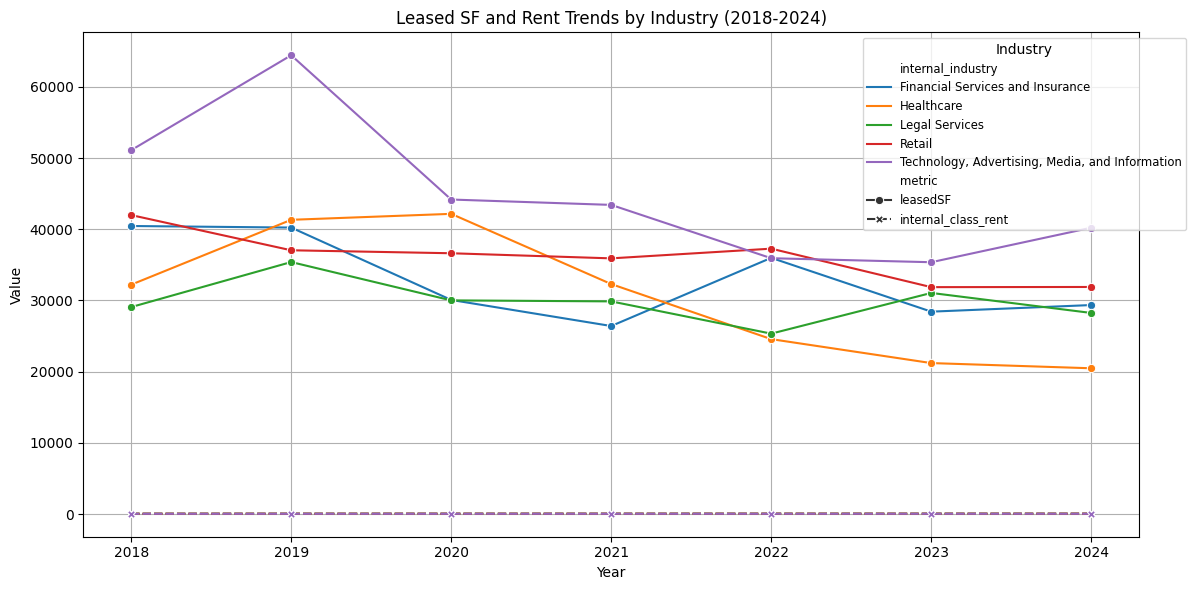

In [31]:
melted_data = industry_rent_trends.melt(id_vars=['year', 'internal_industry'], value_vars=['leasedSF', 'internal_class_rent'],
                                        var_name='metric', value_name='value')

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_data, x='year', y='value', hue='internal_industry', style='metric', markers=True)
plt.title('Leased SF and Rent Trends by Industry (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Industry', loc='upper right', fontsize='small', title_fontsize='medium', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()